In [ ]:
import numpy as np
import astropy as ap
from astropy.io import fits
import matplotlib.pyplot as plt
from IPython.display import display
import scipy as sp
from astropy import units as u
import pandas as pd
import wotan
from wotan import flatten
from astropy.stats import sigma_clip
from astropy.timeseries import TimeSeries,aggregate_downsample,BoxLeastSquares,LombScargle
from sklearn.exceptions import ConvergenceWarning
import warnings
from plotly import express as px
from plotly import graph_objects as go
plt.rcParams["figure.figsize"] = (25,10)

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
Flx = TimeSeries.read("Save.csv") # import the already simply detrended Fluxes from TransitMultiFilter

Now let us start by making a simple Periodogram with using the BoxLeastSquares Algorithm

In [ ]:
BLS = BoxLeastSquares(Flx.time,np.array(Flx["gp-rough"])) # Create a BLS Algorithm Object
BLS_Set = BLS.autopower(0.11*u.d)# Calculate the Periodogram Statistics with the duration of the Transit

At this Point you have to varry around with the Duration abit until you find a Period Spectrum that gives you a strong signal compared to the rest of the noise. It should be noted that the Duration in this case is the Duration of the Actual Transit therefore it will usualy not be bigger than 0.5 days as that is one of the largest Transit Durations ever measured. Usualy we have short transit durations in the range of 0.1-0.2 Days. But of course we dont know these beforhand so you have to vary the Parameter here until you find something that seems strong enough.

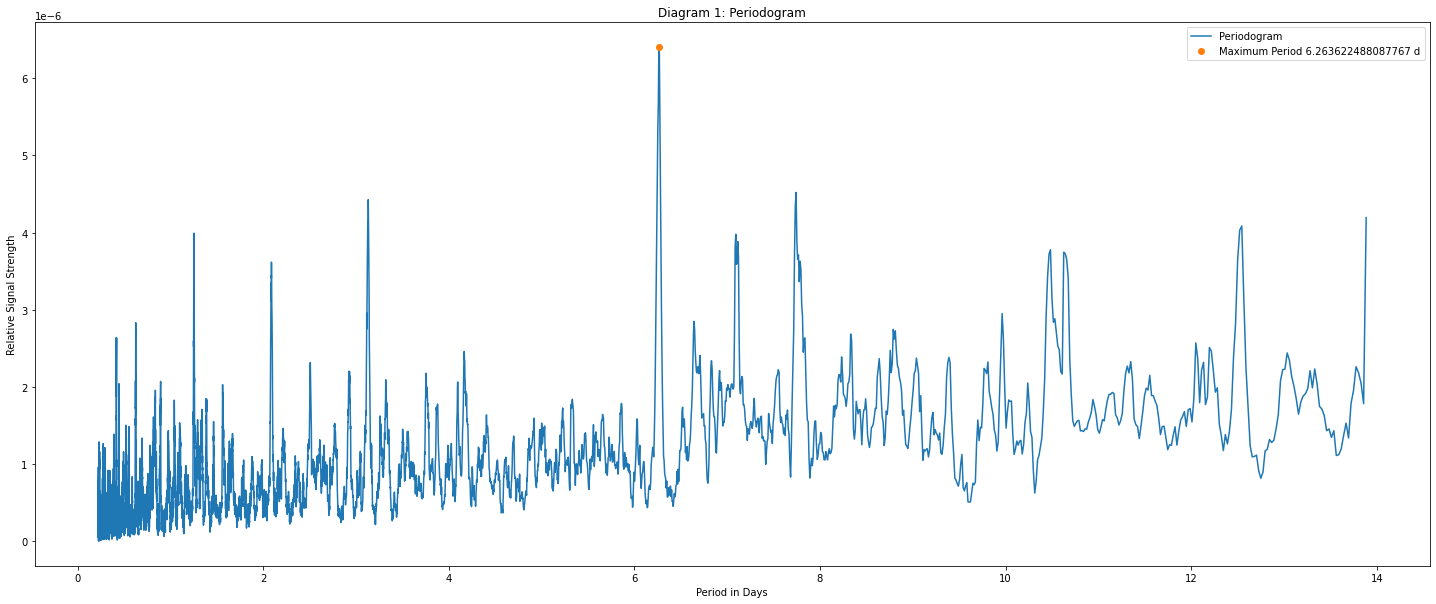

In [ ]:
max_index = np.argmax(BLS_Set.power[:-1])
Period = BLS_Set.period[max_index]

plt.title("Diagram 1: Periodogram")
plt.xlabel("Period in Days")
plt.ylabel("Relative Signal Strength")
plt.plot(BLS_Set.period,BLS_Set.power,label="Periodogram")
plt.plot(BLS_Set.period[max_index],BLS_Set.power[max_index],"o",label=f"Maximum Period {Period}")
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b43e0c11-0b97-4e39-8716-b644d99b659d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>